# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-learn library.



In [1]:
What_we_are_covering =[
'0. An end-to-end Scikit-Learn workflow',
'1. Getting the data ready'
'2. Choosing the right estimator/algorithm for our problems'
'3. Fit the model/algorithm and use it to make  predictions on our data'
'4. Evaluating a model'
'5. Improve a model'
'6. Save and load a trained model'
'7. Putting it all together !']

In [1]:
# Standard imports
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn  workflow

In [8]:
# 1.Get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X( Features matrix)
X=heart_disease.drop("target",axis=1)

# Create y (Labels)
y=heart_disease["target"]

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
clf.fit(X_train,y_train);

In [16]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3


In [12]:
y_train

32     1
22     1
152    1
3      1
239    0
      ..
120    1
97     1
146    1
181    0
18     1
Name: target, Length: 242, dtype: int64

In [15]:
# 4. make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

C:\Users\prath\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
# the above does not work bcoz array([0,2,3,4]) does not look anything like X_train.
# bcoz our model cant make  predictions on the things that arent the same shape as the data its trained on(X_train)
# but what does look like X_train is X_test

# So lets fix that error by asking our model to predict on X_test which in turn predicted the label y_preds for each of our samples

In [18]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2


In [19]:
y_preds=clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [20]:
# 4.Evaluate the model on the training data and the test data
clf.score(X_train,y_train)

1.0

In [21]:
clf.score(X_test,y_test)

0.8360655737704918

In [22]:
# through above two outputs we may imply that our model got an accuracy of 100% on the training data but 83% on the test data..that is fine.
y_test

50     1
41     1
141    1
112    1
90     1
      ..
205    0
268    0
110    1
172    0
49     1
Name: target, Length: 61, dtype: int64

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.87      0.87      0.87        39

    accuracy                           0.84        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.84      0.84      0.84        61



In [24]:
# So what this above output shows us is some  classification metrics that compare the test labels(y_test) to the prediction labels(y_preds) that we made up earlier

In [25]:
confusion_matrix(y_test,y_preds)

array([[17,  5],
       [ 5, 34]], dtype=int64)

In [28]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [30]:
# 5.Improve a model
# Try different amount of n_estimators(as n_estimators is one of the hyperparameters of the model)
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 70.49%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [31]:
# Through above result we found out that maybe 20 estimators is the best for our model coz it got the highest accuracy

# 6. Save a model and load it
import pickle
pickle.dump(clf,open("random_forst_model_1.pkl","wb"))

In [32]:
loaded_model=pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.819672131147541

In [33]:
# and this result is the same as our last model accuracy with 90 estimators value

## 1.Getting our data ready to be used with machine learning

Three main things we have to do :-

    1.Split the data into features and labels (usually 'X' and 'y' respectively)
    
    2.Filling(also called imputing) or disregarding missing values [bcoz a ML model cant learn when there is nothing there-> as it will throw an error then]
    
    3.Converting non-numerical values to numerical values (also called feature encoding)

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X=heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [11]:
len(heart_disease)

303

In [12]:
X.shape

(303, 13)

In [13]:
X.shape[0]

303

In [14]:
X.shape[0]*0.8

242.4

In [15]:
242+61

303

In [16]:
# The above implies and confirms that 20 % of 303 is taken for test set ..rest 80% for training set 
# (For X_train and X_test and similarly for y_train and y_test)

## 1.1  Making sure it's all Numerical

In [18]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [19]:
len(car_sales)

1000

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# Split into X/y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]
# i.e. Here we want to use the X to predict the y

# Split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [26]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [ ]:
# Its safe to assume that "Doors" is numerical coz we have got 4,5,3 as values ..but its also categorical bcoz u could go cars
# with 4 doors fit into this 1 st row (of 856) category , cars with 5 rows fit into another category and cars with 3 doors fit 
# into this category (with 65 doors) 

In [31]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot= OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
# Another way to do this instead of one hot encoder is
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# see above ,Bcoz doors is numerical so dummies method hasnt worked on doors but it has worked on make and colour column


In [35]:
# ( Now that our data is in 1's and 0's) Let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there are missing values ?

There are two main ways to deal with missing data
1. Fill them with some value (also called imputation )
2. Remove the samples with missing data altogether

In [2]:
# Import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [5]:
# This will show us how many missing values there are , in each column
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
# Create X and y
# Using first 4 columns to predict Price just like earlier
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [7]:
# Lets try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot= OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [9]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

#### Option1: Fill missing data with pandas

In [10]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [11]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

Price is the label here as we are trying to predict the Price

What we might do now is just remove the rows from our data frame that have missing Price values. So we are gonna lose some data 
but its hard to really predict something when it doesn't have a label

In [12]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [13]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [14]:
len(car_sales_missing)

950

In [15]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [17]:
# Lets try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot= OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 : Fill missing data and transforming categorical data with Scikit-Learn

Note: This section is different to the video. The video shows filling and transforming the entire dataset (X) and although the techniques are correct, it's best to fill and transform training and test sets separately (as shown in the code below).

The main takeaways:

* Split your data first (into train/test)
* Fill/transform the training set and test sets separately

In [4]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [5]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [9]:
# Split into X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

# Split data into train and test
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [10]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [14]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer=SimpleImputer(strategy='constant',fill_value="missing") # means constantly fill the missing values with "missing"
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_feature=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

# Fill train and test values separately
filled_X_train=imputer.fit_transform(X_train)
filled_X_test=imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [24]:
# Get our transformed array's data back into the DataFrame
car_sales_filled_train=pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])

car_sales_filled_test=pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [25]:
# check to see the original...still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [28]:
# Now lets one hot encode the features with the same code as before
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

# Fill train and test values separately
transformed_X_train=transformer.fit_transform(car_sales_filled_train)
transformed_X_test=transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [29]:
# Now we have transformed X , Let see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

# Make sure to use transformed(filled and one -hot encoded X data)
model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.21229043336119102

In [34]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
# Check Length of transformed data (filled and one-hot encoded )
# vs. Length of original data 
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()),len(car_sales_missing)

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem

Some things to note :
    
* Sklearn refers to machine learning models,algorithms as estimators.
(And then within those estimators you have classifiers,which are classification models and regressors ,which is a regression model)

* Classification problem - predicting a category (heart disease or not)
      * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
    
* Regression problem - predicting a number (selling price of a car)    

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [3]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# Putting above housing dictionary's key "data" and key "feature_names" values' into a datframe 
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"]  # median house price in $100,100s

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set) [becoz we want our model to learn from the training data and predict on the test data]
model=Ridge()
model.fit(X_train,y_train)

# Check the score of the model(on the test set)
model.score(X_test,y_test)

0.5758549611440129

What if 'Ridge' didn't work or the score didn't fit our needs ?

Well, we could always try a different model...

How about we try an ensemble method (an ensemble is combination of smaller models to try and make better predictions 
                                    than just a single model) ?

Sklearn's ensemble models can be found here : https://scikit-learn.org/stable/modules/ensemble.html



In [22]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X= housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create random forest model
model=RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

Let's go to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [6]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [5]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Setup random seed 
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf=LinearSVC()
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

C:\Users\prath\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [13]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
# Though the above model is giving a good accuracy and we dont need to try other models now (i think)
# But stll trying out Random Forest Classifier
# Though we should've gone to Random Forest Classifier(in Ensemble Classifiers) ONLY IF our LinearSVC model was not working (according to the map)
# But stll just trying out Random Forest Classifier

In [15]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test,y_test)

0.8524590163934426

Tidbit in machine learning :-

    1. If you have structured data(aka tables or data frames,etc.) , use ensemble methods such as random forest
    (Why ? - becoz it'll perform pretty well if there are patterns)
     
    2. If you have unstructured data(like images,audio,text,etc.) , use deep learning or transfer learning

## Fit the model/algorithm on our data and  use it to make predictions

### 3.1 Fitting the model to the data

Different names for :
* `X`=features(or feature variables or data)
* `y`=labels(or targets or target variables)

In [6]:
# Import the RandomForestClassifier estimator class
# This is saying hey sklearn ensemble library import the  random forest classifier model 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf=RandomForestClassifier()

# Fit the model to the data(training the machine learning model)
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

## Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.
* Random Forest Wikipedia - https://en.wikipedia.org/wiki/Random_forest
* Random Forest Wikipedia (simple version) - https://simple.wikipedia.org/wiki/Random_forest
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen - https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

### 3.2 Making predictions using a machine learning model
(i.e. how can we use what it has learned to make some predictions on the data the model hasn't seen)

2 ways to make predictions :

1.`predict()`

2.`predict_proba()`

In [7]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,3,8,4]))  # This doesn't work


C:\Users\prath\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 3. 8. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
# Our model has trained on the training data and it has never seen the test data before
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [9]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [10]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [11]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
# now we can we can compare the predictions to the truth
# In our case this output of np.array(y_test) is the truth(the test labels) and the output of clf.predict(X_test) are  our predictions.

In [13]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [14]:
clf.score(X_test,y_test)

0.8524590163934426

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [8]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [7]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [10]:
# Let's predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

So what the output of predict_proba() is saying that ,based on what it has learned from the training data , it's 
saying for eg. here that there is a 0.89 probability ,in the first row of X_test, of the target being 0(vs 0.11 
probability of being 1). Likewise in the second row of X_test , there is a 0.51 proability of the target being  1 and so
on....

And accordingly it is assigned 0 or 1 ( which we can see in the output of the clf.predict() )

`predict()` can also be used for regression models

In [14]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
from  sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data 
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create model instance
model=RandomForestRegressor()

# Fit the model to the  data
model.fit(X_train,y_train)

# Make predictions
y_preds=model.predict(X_test)

In [16]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [17]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [18]:
len(y_preds)

4128

In [19]:
len(y_test)

4128

In [20]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators :

    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions
   
You can read more about these here : https://scikit-learn.org/stable/modules/model_evaluation.html   

### 4.1 Evaluating a model with the `score` method

In [23]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Create train/test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create classifier model instance 
clf=RandomForestClassifier()

# Fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
# On changing the n_estimators in the RandomForestClassifier() {like changing it to 2 or 5 ,etc.} , the training and test score may change !!!
clf.score(X_train,y_train)

1.0

In [25]:
# We want our model to be able to learn enough from the training features and training labels to predict on samples it hasn't seen before 
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` method on our regression problem...

In [5]:
from  sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data 
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create model instance
model=RandomForestRegressor(n_estimators=100)

# Fit the model to the  data
model.fit(X_train,y_train)

RandomForestRegressor()

In [6]:
# The default score() evaluation metric is r_squared for regression algorithms 
model.score(X_train,y_train)

0.9736801960414609

In [7]:
model.score(X_test,y_test)

0.8065734772187598

## 4.2 Evaluating a model using the `scoring` parameter 

In [9]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Create train/test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create classifier model instance 
clf=RandomForestClassifier()

# Fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
clf.score(X_test,y_test)

0.8524590163934426

In [11]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [12]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [13]:
np.random.seed(42)

# Single training and test split score
clf_single_score=clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

 Default scoring parameter of classifier = mean accuracy 
 
clf.score()

In [15]:
# Scoring parameter set to None by  default
# When we have scoring set to None ,its going to use the default evaluation metric for cross-validation on our classifer(i.e.mean accuracy)
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)

In [7]:
np.mean(cross_val_score)

0.8248087431693989

In [8]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [9]:
# Create X_test...etc.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [13]:
from sklearn.metrics import roc_curve

# Fit the classifier 
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs=clf.predict_proba(X_test)

y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [11]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [12]:
# Calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

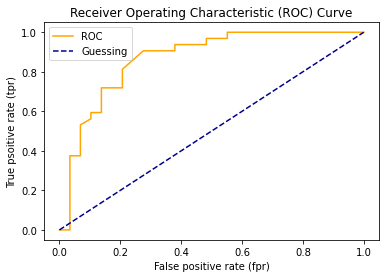

In [13]:
# Creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) and true positive rate (tpr) of a model .
    """
# Plot roc curve 
plt.plot(fpr,tpr,color="orange",label="ROC")

# Plot line with no predictive power(baseline)
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

# Customizing the plot
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True psoitive rate (tpr)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

plot_roc_curve(fpr,tpr)

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

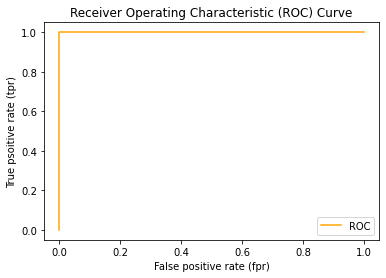

In [15]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

# Plot roc curve 
plt.plot(fpr,tpr,color="orange",label="ROC")

# Customizing the plot
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True psoitive rate (tpr)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [16]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predict and the actual labels it was supposed to predict

In essence , giving you an idea of where the model is getting  confused.

In [14]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [19]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])


Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [20]:
23+6+6+26

61

In [22]:
len(y_preds),len(X_test)

(61, 61)

In [25]:
# 1 st method to install seaborn
# go to anaconda prompt and write "conda install seaborn" in ur activated environment

# 2 nd method (How install a conda package into the current environment directly from a Jupyter Notebook)
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




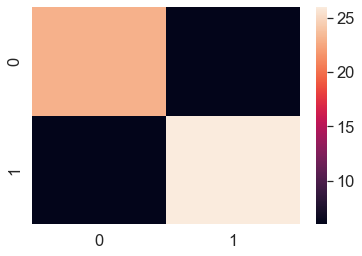

In [26]:
# Make our confusion matrix more visual with Seaborn's heatmap()
# Seaborn is a visualization library that is built on the top of matplotlib and heatmap() is a function of it .
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-Learn 

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.
2. sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

import sklearn

sklearn.\__version\__

If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html





In [27]:
import sklearn
sklearn.__version__

'1.0.2'

It is recommend to use from_estimator or from_predictions to create a ConfusionMatrixDisplay.

In [28]:
clf

RandomForestClassifier()

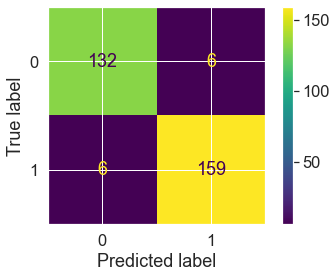

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

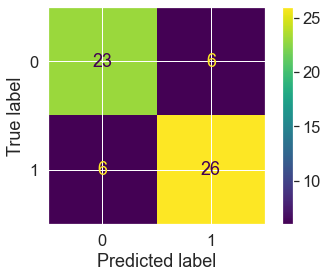

In [32]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)


**Classification Report**

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [16]:
# Where precision and recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1   # only one positive case

disease_preds=np.zeros(10000)   # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\prath\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [17]:
# So the just above example shows how much the classes are imbalanced there and that we cant get to know through the accuracy ..
# Thats why other factors like precision , recall , etc . are very much important too !!

To summarize classification metrics:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.*
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation  - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

* R^2 (pronounced r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

The crux of evaluation : It compares a model's predictions to what it should have predicted 

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [6]:
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import train_test_split

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor()

In [7]:
model.score(X_test,y_test)

0.8065734772187598

In [8]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [10]:
y_test.mean()

2.0550030959302275

In [11]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [12]:
y_test_mean[:10]10

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [13]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [14]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [15]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)


,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [16]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073803

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [17]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [18]:
df["squared_differences"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [19]:
# Calculate MSE by hand
squared=np.square(df["differences"])
squared.mean()

0.25346785208245565

In [23]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared_differences"]=16

In [25]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [26]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766417

In [27]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [28]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.733418071208813

## Machine Learning Model Evaluation(This is note 136 of course so for links at last of this cell go there )

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

* ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

* Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* Precision and recall become more important when classes are imbalanced.

* If false-positive predictions are worse than false-negatives, aim for higher precision.

* If false-negative predictions are worse than false-positives, aim for higher recall.

* F1-score is a combination of precision and recall.

* A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

* R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

* Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

* R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of your model's predictions are on average.

* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

  * Pay more attention to MAE: When being \$10\,000  off is twice as bad as being \$5\,000 off.

  * Pay more attention to MSE: When being \$10\,000  off is more than twice as bad as being \$5\,000 off.

    
For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

### 4.2.3 Finally using the `scoring` parameter

In [7]:
heart_disease=pd.read_csv("heart-disease.csv")
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()


In [7]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)  # if scoring=None , estimator's default scoring evaluation metric is used (which is accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [8]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")


The cross-validated accuracy is : 82.48%


In [9]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [10]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is : 82.48%


In [11]:
# Precision 
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [14]:
# Cross-validated precision 
print(f"The cross-validated precision is : {np.mean(cv_precision)}")

The cross-validated precision is : 0.8329547346025924


What is the best way to understand the terms "precision" and "recall"?

To make myself able to remember their meaning without thinking about true positive/false positive/false negative jargon, I conceptualize them as follows:

Imagine that, your girlfriend gave you a birthday surprise every year in last 10years. (Sorry, I didn’t intend to depress you if you don’t have one.)

However, one day, your girlfriend asks you:

‘Sweetie, do you remember all birthday surprises from me?’

This simple question makes your life in danger.

To extend your life, you need to recall all 10 surprising events from your memory.

So, recall is the ratio of a number of events you can correctly recall to a number of all correct events.

If you can recall all 10 events correctly, then, your recall ratio is 1.0 (100%). If you can recall 7 events correctly, your recall ratio is 0.7 (70%).

Now, it’s easier to map the word recall to real life usage of that word.

However, you might be wrong in some answers.

For example, you answers 15 times, 10 events are correct and 5 events are wrong. This means you can recall all events but it’s not so precise.

So, precision is the ratio of a number of events you can correctly recall to a number all events you recall (mix of correct and wrong recalls). In other words, it is how precise of your recall.

From the previous example (10 real events, 15 answers: 10 correct answers, 5 wrong answers), you get 100% recall but your precision is only 66.67% (10 / 15).

Yes, you can guess what I’m going to say next. If a machine learning algorithm is good at recall, it doesn’t mean that algorithm is good at precision. That’s why we also need F1 score which is the (harmonic) mean of recall and precision to evaluate an algorithm.

Hope that this way of conceptualization could be an alternative way to help you understand and remember the difference between recall and precision.

NOTE:

A number of events you can correctly recall = True positive (they’re correct and you recall them)

A number of all correct events = True positive (they’re correct and you recall them) + False negative (they’re correct but you don’t recall them)

A number of all events you recall = True positive (they’re correct and you recall them) + False positive (they’re not correct but you recall them)

recall = True positive / (True positive + False negative)

precision = True positive / (True positive + False positive)

In [15]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [16]:
# Cross-validated recall
print(f"The cross-validated recall is : {np.mean(cv_recall)}")

The cross-validated recall is : 0.8545454545454545


Let's see the `scoring` parameter being used for a regression problem...

In [17]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
# Putting above housing dictionary's key "data" and key "feature_names" values' into a datframe 
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor(n_estimators=100)

In [21]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [22]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [23]:
# The closer the value in case of neg_mean_squared_error and neg_mean_absolute_error , the better the value . note in these two cases the maximum is 0

In [24]:
# Mean squared error
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4303784827892982

In [25]:
cv_mse

array([-0.52608501, -0.34777555, -0.37442498, -0.43875233, -0.46485455])

In [26]:
# Mean absolute error
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46680736586240323

In [27]:
cv_mae

array([-0.54516475, -0.41053355, -0.43822559, -0.46671669, -0.47339624])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [31]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create model
clf=RandomForestClassifier()

# Fit model
clf.fit(X_train,y_train)

# Make predictions
y_preds=clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [33]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create model
model=RandomForestRegressor()

# Fit model
model.fit(X_train,y_train)

# Make predictions
y_preds=model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## 5. Improving a model
First predictions = baseline predictions. 

First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns in data

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [2]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# The above are the  RandomForestClassifier's hyper parameters that we can adjust

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets , training , validation and test

In [4]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [3]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs  y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy,2),"precision": round(precision,2), "recall": round(recall,2) , "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [4]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease=pd.read_csv("heart-disease.csv")
# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train , validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))  # 15% of data
X_train , y_train = X[:train_split] , y[:train_split]
X_valid , y_valid = X[train_split:valid_split] , y[train_split:valid_split]
X_test , y_test = X[valid_split:] , y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train , y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on  validation set
baseline_metrics = evaluate_preds(y_valid , y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [5]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
# n_jobs stands for how much of your computer process are u going to dedicate towards this machine learning model , and -1 means all of it !! 
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10,  # number of models to try
                            cv = 5 , # 5-fold cross-validation
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train , y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [7]:
# This is gonna show us which combination from the above is giving the best results
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

And now when we call predict() on our RandomizedSearchClassifier , by default it's going to use these best parameters ...so instead of finding them  by hand , RandomizedSearchCV has found them for us 

In [8]:
# Now lets make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test , rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [9]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [10]:
#e.g.
(6*5*2*3*3)*5

2700

In [11]:
grid_2 = {"n_estimators": [10,200,500],
        "max_depth": [None],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1,2]}

In [12]:
(3*1*2*1*2)*5

60

In [13]:
from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
# n_jobs stands for how much of your computer process are u going to dedicate towards this machine learning model , and -1 means all of it !! 
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid = grid_2,
                            cv = 5 , # 5-fold cross-validation
                            verbose = 2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train , y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_est

In [14]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [15]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 80.33%
Precision: 0.77
Recall: 0.82
F1 score: 0.79


Let's compare our different models metrics

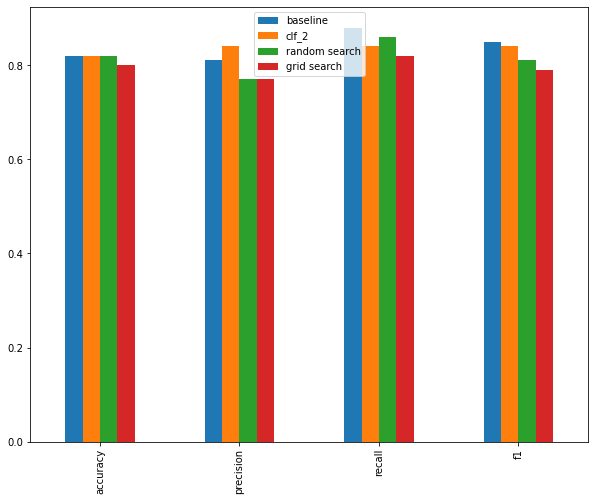

In [17]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, "clf_2": clf_2_metrics , "random search": rs_metrics , "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

### Note: Metric Comparison Improvement

In the previous video, we compared the metric results of 3 different models. However, there was a small error.

As always, when comparing models, you should be careful to make sure they're compared on the same splits of data.

For example, let's say you have model_1 and model_2 which each differ slightly.

If you want to compare and evaluate their results, model_1 and model_2 should both be trained on the same data (e.g. X_train and y_train) and their predictions should each be made on the same data, for example:

* model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds

* model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

The example in the video followed these steps but since the data was split differently for the baseline model, the comparisons aren't fully correct.

An example end-to-end notebook with the correct methodology has been created on Google Colab here:

https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m

The short notebook compares 3 different models on the heart disease dataset.

1. A baseline RandomForestClassifier (all default parameters)

2. A RandomForestClassifier tuned with RandomizedSearchCV

3. A RandomForestClassifier tuned with GridSearchCV

The most important part is they all use the same data splits created using train_test_split() and np.random.seed(42).

## 6.Saving and loading trained machine learning models

2 ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [14]:
import pickle

# Save an existing model to file (wb stands for write binary)
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [15]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [16]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc: 80.33%
Precision: 0.77
Recall: 0.82
F1 score: 0.79


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}

**Joblib**

In [17]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [18]:
# Import a saved joblib model
loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [19]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 80.33%
Precision: 0.77
Recall: 0.82
F1 score: 0.79


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}

## 7. Putting it all together !

In [2]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [3]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [4]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
# Scikit-learn pipelines main input is steps , which is a list that contains a tuple which has step name and action to take

# and in our this case , our steps are first , we need to fill the missing data and then convert the data to numbers and then build a machine learning model on it.

This is our refinement using pipeline

Steps we want to do (all in one cell) :
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [7]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"] , inplace=True)

# Define different features and transformer pipeline

categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant" , fill_value = "missing" )),
    ("onehot" , OneHotEncoder(handle_unknown = "ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values , then convert to numbers)
preprocessor = ColumnTransformer(
                      transformers = [
                          ("cat",categorical_transformer,categorical_features),
                          ("door", door_transformer, door_feature),
                          ("num",numeric_transformer,numeric_features)
                      ])

# Creating a preprocessing and modelling pipeline

# (So now essentially what we're doing is we're putting our pre-processing steps together with a modelling step
#  and because there are multiple steps , we'll use a pipeline to combine them )

model = Pipeline(steps=[("preprocessor",preprocessor),
                         ("model", RandomForestRegressor())])
# So now we've got our model pipeline set on , which  will go through preprocessing . Once the preprocessing is done , it  will build a random forest classifier on it.

#  Split the data 
X = data.drop("Price",axis=1)
y=data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.22188417408787875

see this for more information on above
https://colab.research.google.com/drive/1AX3Llawt0zdjtOxaYuTZX69dhxwinFDi?usp=sharing

It's also possible to use `GridSearchCV` or `RandomizedSesrchCV` with our Pipeline.

In [8]:
# Use GridSearchCV with our regression Pipeline (and improving above score through hyperparamter tuning)
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [9]:
(2*2*2*1*2)*5

80

In [10]:
gs_model.score(X_test, y_test)

0.3339554263158365